<a href="https://colab.research.google.com/github/DubaKanu/pca-from-scratch/blob/main/PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

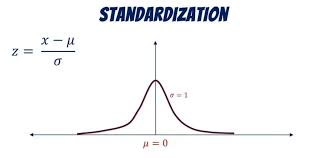


In [ ]:
#Import necessary libraries
import numpy as np

The dataset used in this project is titled “GDP Growth of African Countries (1960–2023)” and was obtained from Kaggle. It contains annual Gross Domestic Product (GDP) values, measured in current US dollars (NY.GDP.MKTP.CD), for over 30 African countries between 1960 and 2023. Each column represents a country, while each row represents a specific year. The values show the size and growth of each country’s economy over time.

This dataset is valuable because it provides a long-term view of Africa’s economic performance, making it ideal for analyzing trends, identifying similarities between countries, and detecting patterns of economic development through PCA.

In [ ]:
# Load the dataset

file_path = "/content/Africa_GDP.csv"

data = np.genfromtxt(file_path, delimiter=",", skip_header=1)

# Display the shape of the data
print("Dataset shape:", data.shape)

# Display first few rows to confirm it loaded correctly
print("First 5 rows:\n", data[:2])

Dataset shape: (64, 34)
First 5 rows:
 [[1.96000000e+03 2.72361545e+09 2.26195578e+08 3.04114137e+07
  3.30442816e+08 1.95999990e+08 6.14206068e+08 1.12155598e+08
  3.13582728e+08 3.50768460e+07 1.61051169e+09 1.41468978e+08
  1.22394366e+09 7.91265460e+08 3.45799862e+07 1.90495600e+08
  4.01644249e+08 6.73081725e+08 1.62089564e+08 2.03715474e+09
  4.49526873e+08 4.19617450e+09 1.19000024e+08 1.00369237e+09
  1.20120246e+07 3.22151471e+08 1.80459937e+08 8.74859650e+09
  1.12701149e+09 2.65172981e+09 1.71057069e+08 4.23008386e+08
  7.13000000e+08 1.05299040e+09]
 [1.96100000e+03 2.43474706e+09 2.35668220e+08 3.29026129e+07
  3.50247234e+08 2.02999992e+08 6.52777608e+08 1.23134584e+08
  3.33975336e+08 4.30260428e+07 1.68085951e+09 1.67637907e+08
  1.30985916e+09 7.92959473e+08 3.56999857e+07 1.83920900e+08
  4.43905612e+08 6.99161945e+08 1.91757729e+08 2.02569354e+09
  4.85785231e+08 4.46728789e+09 1.22000016e+08 1.05897526e+09
  1.15920238e+07 3.27979248e+08 1.91659914e+08 9.22599631e+0

In [ ]:
# Check if there are any NaN values
has_nan = np.isnan(data).any()
print("Are there any missing values in the dataset?", has_nan)

# Count total number of NaNs
num_nan = np.isnan(data).sum()
print("Total missing values in the dataset:", num_nan)

# check missing values per column
nan_per_column = np.isnan(data).sum(axis=0)
print("Missing values per column:\n", nan_per_column)

Are there any missing values in the dataset? False
Total missing values in the dataset: 0
Missing values per column:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = (data - (np.mean(data, axis=0))) / (np.std(data, axis=0))
standardized_data[:5]  # Display the first few rows of standardized data

array([[-1.70519568, -1.01800156, -0.82819294, -0.93575654, -0.84257979,
        -1.11860451, -1.04604681, -1.31913707, -0.8040672 , -1.00523004,
        -0.63810834, -1.05258027, -0.69810215, -0.72900724, -1.05658135,
        -0.84442443, -1.39911009, -1.11325314, -0.96134348, -1.01804241,
        -0.87268704, -0.92169289, -0.85740505, -0.9846317 , -0.97877888,
        -0.88663692, -0.83914377, -1.12272562, -0.93284004, -0.82536273,
        -1.04058758, -0.78494085, -0.83448385, -1.01285695],
       [-1.65106248, -1.02182128, -0.82644185, -0.93535412, -0.83912057,
        -1.11057031, -1.04321078, -1.30443675, -0.79963335, -1.00058882,
        -0.63608592, -1.04845069, -0.69446962, -0.72895515, -1.05529373,
        -0.85002684, -1.39731444, -1.10737309, -0.95512955, -1.01829685,
        -0.86442368, -0.92009215, -0.85657472, -0.97766577, -0.97948674,
        -0.88242764, -0.83546991, -1.11939259, -0.92835245, -0.81680513,
        -1.03749515, -0.78354309, -0.83631265, -1.00709155],
  

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(data, ddof=0, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[3.41250000e+02, 1.26073548e+12, 8.85441616e+10, ...,
        2.06185678e+11, 1.41307075e+11, 1.14487120e+11],
       [1.26073548e+12, 5.71922511e+21, 3.88955078e+20, ...,
        9.35496979e+20, 6.73291149e+20, 4.88307676e+20],
       [8.85441616e+10, 3.88955078e+20, 2.92633251e+19, ...,
        7.01813727e+19, 4.73454031e+19, 3.67354252e+19],
       ...,
       [2.06185678e+11, 9.35496979e+20, 7.01813727e+19, ...,
        1.75476089e+20, 1.15704719e+20, 9.24786059e+19],
       [1.41307075e+11, 6.73291149e+20, 4.73454031e+19, ...,
        1.15704719e+20, 8.35300024e+19, 6.05170631e+19],
       [1.14487120e+11, 4.88307676e+20, 3.67354252e+19, ...,
        9.24786059e+19, 6.05170631e+19, 5.73366937e+19]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([5.91489523e+22, 1.54770328e+21, 8.60801724e+20, 2.46592683e+20,
        9.72094414e+19, 7.13169813e+19, 2.77610943e+19, 1.23044230e+19,
        6.27693057e+18, 4.13136746e+18, 3.36501788e+18, 2.50343808e+18,
        1.84506265e+18, 7.82370227e+17, 4.84683931e+17, 3.98667237e+17,
        2.35974778e+17, 1.51940928e+17, 8.16130130e+16, 7.37759600e+16,
        4.53031315e+16, 3.92979583e+16, 3.15099353e+16, 1.65831062e+16,
        1.41544486e+16, 1.01287258e+16, 7.00357311e+15, 5.42908992e+15,
        3.66264001e+15, 8.71173341e+03, 2.00589180e+15, 4.59444991e+14,
        1.16476562e+15, 8.89452793e+14]),
 array([[-6.94515304e-11,  1.06621318e-10,  3.81675014e-11, ...,
         -1.98592428e-08,  2.28001889e-08,  3.00079473e-09],
        [-3.05406074e-01,  1.03012152e-01,  1.63757735e-01, ...,
          2.35301582e-03, -4.25823927e-03,  1.84518838e-03],
        [-2.12225839e-02,  1.44553851e-05,  5.09464048e-02, ...,
          3.96468325e-02,  1.91889852e-01, -1.72765835e-01],
    

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
# np.argsort can only provide lowest to highest; use [::-1] to reverse the list since we were asked to make use of descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[-6.94515304e-11,  1.06621318e-10,  3.81675014e-11, ...,
         3.00079473e-09, -1.98592428e-08, -1.00000000e+00],
       [-3.05406074e-01,  1.03012152e-01,  1.63757735e-01, ...,
         1.84518838e-03,  2.35301582e-03, -1.92777712e-10],
       [-2.12225839e-02,  1.44553851e-05,  5.09464048e-02, ...,
        -1.72765835e-01,  3.96468325e-02, -1.18185861e-09],
       ...,
       [-5.10331140e-02, -3.19422391e-02,  1.39041286e-01, ...,
         8.96471391e-03,  5.84752028e-03,  1.70837538e-09],
       [-3.64437858e-02, -1.25045238e-02,  3.77770840e-02, ...,
         7.22549314e-03, -4.55878072e-03, -2.94429496e-10],
       [-2.69819819e-02, -2.72947830e-02,  8.25518779e-02, ...,
        -2.13433321e-03, -3.19871059e-04,  4.35165322e-12]])

Deciding how many principal components (PCs) to keep is usually based on the explained variance, which tells us how much of the original data’s information is captured by each PC. Therefore let us calculate for the Explained variance

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# sort eigenvalues useful for explained variance
sorted_eigenvalues = eigenvalues[sorted_indices]

# Numeric explained variance (for computation)
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Pretty display
explained_variance_percent = ["{:.2f}%".format(v * 100) for v in explained_variance_ratio]
print("Explained Variance per PC:", explained_variance_percent)

Explained Variance per PC: ['95.35%', '2.49%', '1.39%', '0.40%', '0.16%', '0.11%', '0.04%', '0.02%', '0.01%', '0.01%', '0.01%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%']


In [ ]:
# Step 6: Project Data onto Principal Components
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Decide on the number of principal components to keep
print("Number of principal components to keep (95% variance):", num_components)
reduced_data = standardized_data.dot(sorted_eigenvectors[:, :num_components])  # Project data onto the principal components
reduced_data[:5]


Number of principal components to keep (95% variance): 1


array([[2.6538604 ],
       [2.64895612],
       [2.64100349],
       [2.62666421],
       [2.61234084]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (64, 1)


array([[2.6538604 ],
       [2.64895612],
       [2.64100349],
       [2.62666421],
       [2.61234084]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

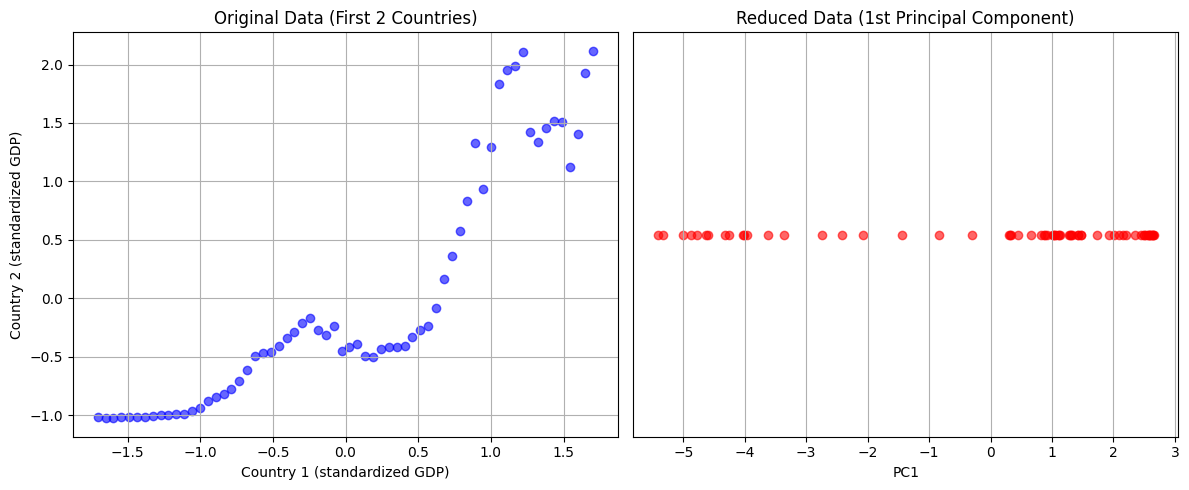

In [ ]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt
# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], color='blue', alpha=0.6)
plt.title("Original Data (First 2 Countries)")
plt.xlabel("Country 1 (standardized GDP)")
plt.ylabel("Country 2 (standardized GDP)")
plt.grid(True)

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], np.zeros_like(reduced_data[:, 0]), color='red', alpha=0.6)
plt.title("Reduced Data (1st Principal Component)")
plt.xlabel("PC1")
plt.yticks([])  # No y-axis since it's 1D
plt.grid(True)
plt.tight_layout()
plt.show()



**ANALYSIS OF OUTPUT**

The results of the PCA reveal that the first principal component alone explains 95.35% of the total variance in the dataset, which is remarkably high. This indicates that nearly all the information contained in the GDP data across the African countries can be captured along a single dominant direction. Consequently, the dynamic selection process correctly determined that only one principal component is sufficient to retain at least 95% of the variance. The projected data onto this component reduces the dataset to a single value per year, reflecting each year’s position along the main trend of variation across all countries. This pattern suggests that the GDPs of most African countries tend to move together over time, highlighting a strong common economic growth trajectory across the continent. Such a result is insightful because it shows that despite the diversity of countries, there exists a dominant underlying trend in their economic development over the period from 1960 to 2023.